# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')
pd.set_option('display.max_columns', 50)

In [2]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

### Вывод

Ну что тут скажешь, у пациента на лицо пропуски в данных, много числовых признаков хранится в типе обджект, а должны во быть во флоате, интежере или даже в булеане(is_apartment, например). Будем делать вскрытие.

### Шаг 2. Предобработка данных

#### Заполняем пропущенные данные

In [4]:
#Значения высоты потолков, площади жилой зоны, площади кухни и количеством дней от размещения до снятия объявления
#заполним медианным значением
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['living_area'] = df['living_area'].fillna(df['living_area'].median())
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())
df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())

#Если не указано, что в конкретном объялении речь идёт об апортаментах, значит это не апартаменты
df['is_apartment'] = df['is_apartment'].fillna(False)

#Если общее количество этажей не указано, будем считать, что это одноэтажное здание
df['floors_total'] = df['floors_total'].fillna(1)

#Если не указано количество балконов, вероятно балкона нет, ставим 0
df['balcony'] = df['balcony'].fillna(0)


df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,30,9,False,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.65,26.0,10.6,6,False,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,30,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,False,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Меняем типы данных в столбцах

In [5]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT')

df['rooms'] = df['rooms'].astype('int')
df['balcony'] = pd.to_numeric(df['balcony']).astype('int')
df['floors_total'] = pd.to_numeric(df['floors_total']).astype('int')

df['is_apartment'] = df['is_apartment'].astype('bool')


df['last_price'] = pd.to_numeric(df['last_price']).astype('int')
df['total_area'] = pd.to_numeric(df['total_area']).astype('int')
df['ceiling_height'] = pd.to_numeric(df['ceiling_height'])
df['living_area'] = pd.to_numeric(df['living_area'])
df['kitchen_area'] = pd.to_numeric(df['kitchen_area'])
df['airports_nearest'] = pd.to_numeric(df['airports_nearest'])
df['cityCenters_nearest'] = pd.to_numeric(df['cityCenters_nearest'])
df['parks_nearest'] = pd.to_numeric(df['parks_nearest'])
df['ponds_nearest'] = pd.to_numeric(df['ponds_nearest'])
df['parks_around3000'] = pd.to_numeric(df['parks_around3000'], errors='ignore')
df['ponds_around3000'] = pd.to_numeric(df['ponds_around3000'], errors='ignore')
df['days_exposition'] = pd.to_numeric(df['days_exposition']).astype('int')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

In [6]:
#Посмотрим на данные после преобразования
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,23699.000000
mean,9.858475,6.541549e+06,60.120511,2.070636,2.724358,10.638719,34.099892,5.892358,10.428526,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,169.360226
std,5.682529,1.088701e+07,35.665822,1.078405,0.988298,6.610834,21.162096,4.885249,5.631126,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,206.535633
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.400000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.000000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
#Нужно что-то сделать с потолками, они врятли могут быть меньше 2,5 метров и больше 6.
df = df[(df['ceiling_height'] > 2) & (df['ceiling_height'] < 6)]

#Самое высокое жилое здание в Лен. области 37 этажей, избавляемся от строк где floors_total
df = df[df['floors_total'] < 37]

df = df.reset_index(drop = True)

In [8]:
#Переведём названия локации в нижний регистр, а то мало-ли
df['locality_name'] = df['locality_name'].str.lower()

#Посмотрим сколько у нас всего локаций
len(df['locality_name'].unique())

364

In [9]:
#Дубликаты есть?
df.duplicated().sum()

0

Никогда не был в Питере, но Яндекс.Карты показывают, что там очень много парков. Наверное люди не указывают расстояние до парка, если он очень близко.

Можно заполнить путые значение нулём или медианой. Мне как-то медианой нравится больше.

#Посмотрим по каким городам пропущено расстояние до ближайщего парка
df.query('parks_nearest == "NaN"').pivot_table(index='locality_name', aggfunc='count').sort_values(by='balcony', ascending=False).head(5)

#Посмотрим по каким городам пропущено расстояние до ближайщего парка
df.query('airports_nearest == "NaN"').pivot_table(index='locality_name', aggfunc='count').sort_values(by='balcony', ascending=False).head(5)

df.describe()

In [10]:
#Посмотрим по каким городам пропущено расстояние до ближайщего водоёма
df.query('ponds_nearest == "NaN"').pivot_table(index='locality_name', aggfunc='count').sort_values(by='balcony', ascending=False).head(5)

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images
locality_name,,,,,,,,,,,,,,,,,,,,,
санкт-петербург,7651,7728,7728,7667,7728,7728,7728,7728,7728,7728,7728,7728,7728,7667,3019,7667,0,7728,7728,7728,7728
посёлок мурино,0,520,520,0,520,520,520,520,520,520,520,520,520,0,0,0,0,520,520,520,520
всеволожск,0,397,397,0,397,397,397,397,397,397,397,397,397,0,0,0,0,397,397,397,397
гатчина,0,306,306,0,306,306,306,306,306,306,306,306,306,0,0,0,0,306,306,306,306
деревня кудрово,0,299,299,0,299,299,299,299,299,299,299,299,299,0,0,0,0,299,299,299,299


7738 значений в столбце с расстояними до ближайщего парка пропущено в Санкт-Петербурге. Это старнно, если учесть что Питер стоит на берегу Невской губы и через весь город течёт р.Нева.

Можно заполнить пропущенные значения медианой по питеру, ну а если квартиры находятся прямо на берегу Невы или Невской губы, то лучше расстояние до водоёма равно 0 метров.

Я думаю, сделаю правильно, если высчитаю медиану по заполненым значениям расстояния до водоёма по г.Санкт-Петербург и ей NaNы.

### Шаг 3. Посчитайте и добавьте в таблицу

In [11]:
#Рассчитаем цену квадратного метра
df['meter_price'] = df['last_price'] / df['total_area']

#Достаём из даты год, день недели и месяц
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
df['weekday_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month


#Посчитаем соотношения жилой площади и площади кухни к общей площади
df['living_total_ratio'] = df['living_area'] / df['total_area']
df['kitchen_total_ratio'] = df['kitchen_area'] / df['total_area']
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,year_exposition,weekday_exposition,month_exposition,living_total_ratio,kitchen_total_ratio
0,20,13000000,108,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95,120370.370370,2019,3,3,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,83750.000000,2018,1,12,0.465000,0.275000
2,10,5196000,56,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,2015,3,8,0.612500,0.148214
3,0,64900000,159,2015-07-24,3,2.65,14,30.0,9,False,False,False,9.1,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,2015,4,7,0.188679,0.057233
4,2,10000000,100,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,2018,1,6,0.320000,0.410000


In [12]:
#Распределим квартиры по категориям в зависимости от этажа
def floor_categoryzator(row):
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floors_total == floor:
        return 'Последний этаж'
        
    if floor == 1:
        return 'Первый этаж'
    
    else:
        return 'Другой'
    
floor_category = df.apply(floor_categoryzator, axis = 1)
print(floor_category.value_counts())

Другой            17412
Последний этаж     3357
Первый этаж        2884
dtype: int64


In [13]:
#Добавляем категории этажей в таблицу
df['floor_category'] = floor_category
df.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,year_exposition,weekday_exposition,month_exposition,living_total_ratio,kitchen_total_ratio,floor_category
0,20,13000000,108,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95,120370.370370,2019,3,3,0.472222,0.231481,Другой
1,7,3350000,40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,83750.000000,2018,1,12,0.465000,0.275000,Первый этаж
2,10,5196000,56,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,2015,3,8,0.612500,0.148214,Другой
3,0,64900000,159,2015-07-24,3,2.65,14,30.00,9,False,False,False,9.10,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,2015,4,7,0.188679,0.057233,Другой
4,2,10000000,100,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,2018,1,6,0.320000,0.410000,Другой
5,10,2890000,30,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,96333.333333,2018,0,9,0.480000,0.303333,Другой
6,6,3700000,37,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,100000.000000,2017,3,11,0.286486,0.389189,Другой
7,5,7915000,71,2019-04-18,2,2.65,24,30.00,22,False,False,False,18.90,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95,111478.873239,2019,3,4,0.422535,0.266197,Другой
8,20,2900000,33,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189,87878.787879,2018,2,5,0.467576,0.266970,Другой
9,18,5400000,61,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289,88524.590164,2017,6,2,0.714754,0.106557,Другой


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучаем цены

count    2.365300e+04
mean     6.540915e+06
std      1.087196e+07
min      1.219000e+04
25%      3.413000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

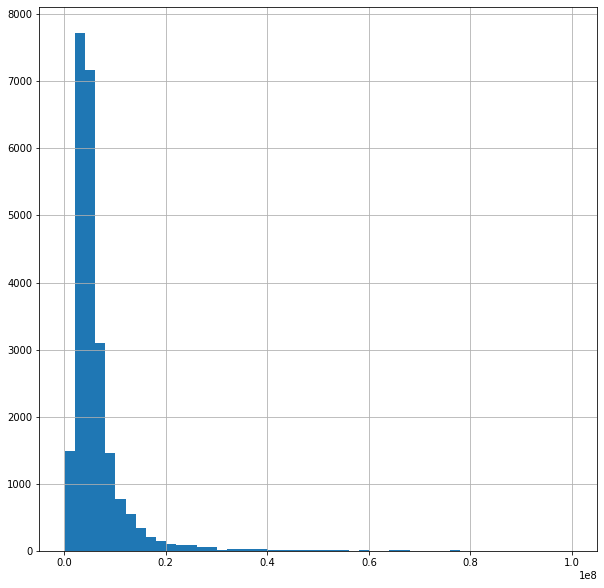

In [14]:
df['last_price'].hist(range =(10**5,  10**8), bins = 50, figsize = (10,10))
df['last_price'].describe()

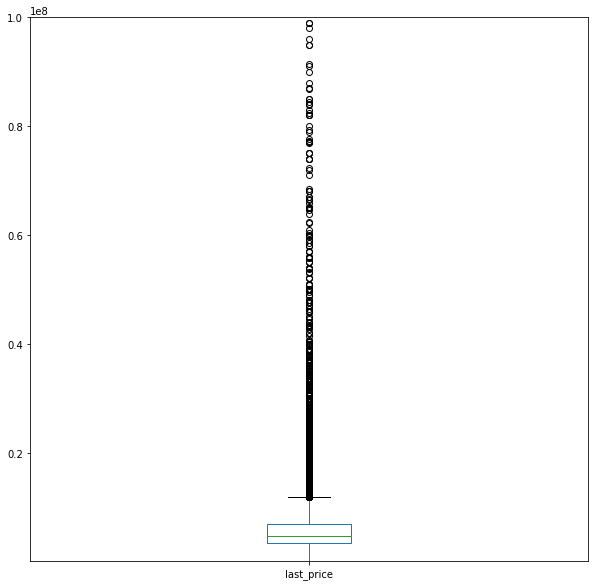

In [15]:
plt.ylim(10**5, 10**8)
df['last_price'].plot(kind='box', figsize = (10,10))

В нашей таблице есть квартиры которые стоят более 300 миллионов, интересно Навальный об этом знает?
Посмотрим сколько что это за объекты недвидимости.

In [16]:
df.query('last_price > 300000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,year_exposition,weekday_exposition,month_exposition,living_total_ratio,kitchen_total_ratio,floor_category
1434,19,330000000,190,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.0,0,санкт-петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233,1.736842e+06,2018,2,4,0.500000,0.210526,Другой
12950,19,763000000,400,2017-09-30,7,2.65,10,250.0,10,False,False,False,9.1,2,санкт-петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33,1.907500e+06,2017,5,9,0.625000,0.022750,Последний этаж
14684,15,401300000,401,2016-02-20,5,2.65,9,204.0,9,False,False,False,24.0,3,санкт-петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393,1.000748e+06,2016,5,2,0.508728,0.059850,Последний этаж
19506,8,420000000,900,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,санкт-петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106,4.666667e+05,2017,2,12,0.455222,0.124444,Последний этаж


Вообще могут быть квартиры в Питере, наверное площадью 400 квадратов могут стоить по 763 миллиона. Космические суммы какие-то, но удалять не буду.

### Изучим площадь

count    23653.000000
mean        60.134190
std         35.679901
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

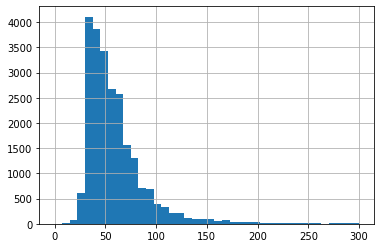

In [17]:
df['total_area'].hist(bins=40, range = (0,300))
df['total_area'].describe()

Есть квартиры с площадью меньше 20 кв.метров, это странно? не думал что такие бывают, посмотрим подробнее

In [46]:
df.query('total_area < 20')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,year_exposition,weekday_exposition,month_exposition,living_total_ratio,kitchen_total_ratio,floor_category
714,5,1500000,17,2017-06-07,0,2.70,9,12.00,1,False,True,False,9.1,0,посёлок шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40,88235.294118,2017,2,6,0.705882,0.535294,Первый этаж
4535,12,3300000,18,2018-11-07,1,3.50,5,9.00,2,False,False,False,9.1,0,санкт-петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9,183333.333333,2018,2,11,0.500000,0.505556,Другой
5840,3,945750,19,2017-09-18,0,2.76,3,12.70,2,False,True,False,9.1,0,поселок городского типа дубровка,NaN,NaN,NaN,NaN,NaN,NaN,3,49776.315789,2017,0,9,0.668421,0.478947,Другой
6068,6,770000,18,2017-10-16,1,2.65,5,13.00,4,False,False,False,3.0,0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90,42777.777778,2017,0,10,0.722222,0.166667,Другой
8437,7,2250000,19,2019-03-12,0,3.00,6,30.00,2,False,True,False,9.1,0,санкт-петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44,118421.052632,2019,1,3,1.578947,0.478947,Другой
8712,9,2200000,18,2018-08-20,1,2.52,3,14.00,3,False,False,False,2.4,0,пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59,122222.222222,2018,0,8,0.777778,0.133333,Последний этаж
8738,1,1350000,18,2017-11-22,0,2.75,19,15.80,1,False,True,False,9.1,0,санкт-петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128,75000.000000,2017,2,11,0.877778,0.505556,Первый этаж
8869,10,2450000,15,2018-08-22,0,2.65,5,10.00,2,False,True,False,9.1,0,санкт-петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27,163333.333333,2018,2,8,0.666667,0.606667,Другой
9140,0,3400000,17,2018-03-18,1,2.65,5,15.00,2,False,False,False,9.1,0,санкт-петербург,21555.0,1967.0,2.0,336.0,1.0,309.0,117,200000.000000,2018,6,3,0.882353,0.535294,Другой
9394,5,2100000,16,2017-12-10,0,2.65,6,13.00,1,False,False,True,9.1,0,санкт-петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3,131250.000000,2017,6,12,0.812500,0.568750,Первый этаж


Значит бывают такие маленькие квартиры. Открытие года))

### Изучим количество комнат

count    23375.000000
mean         2.066353
std          1.073537
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

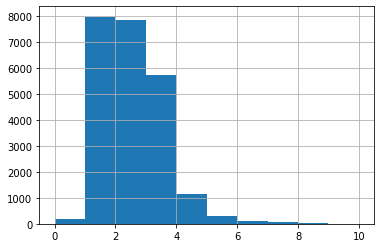

In [48]:
df['rooms'].hist(bins=10, range = (0,10))
df['rooms'].describe()

### Изучим высоту потолков

count    23375.000000
mean         2.696080
std          0.218133
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

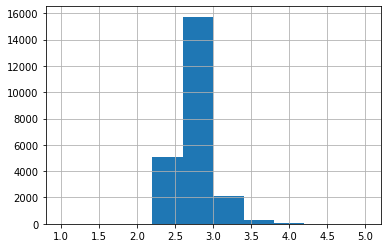

In [50]:
df['ceiling_height'].hist(bins=10, range = (1,5))
df['ceiling_height'].describe()

С потолками всё норм, самые распространённые от 2,5 до 3 метров, ну а дальше идёт недвижимость о которой стоит всё-таки рассказать Навальному))

### Изучим время продажи недвижимости

count    23375.000000
mean       157.545497
std        176.055939
min          1.000000
25%         45.000000
50%         95.000000
75%        191.000000
max        999.000000
Name: days_exposition, dtype: float64

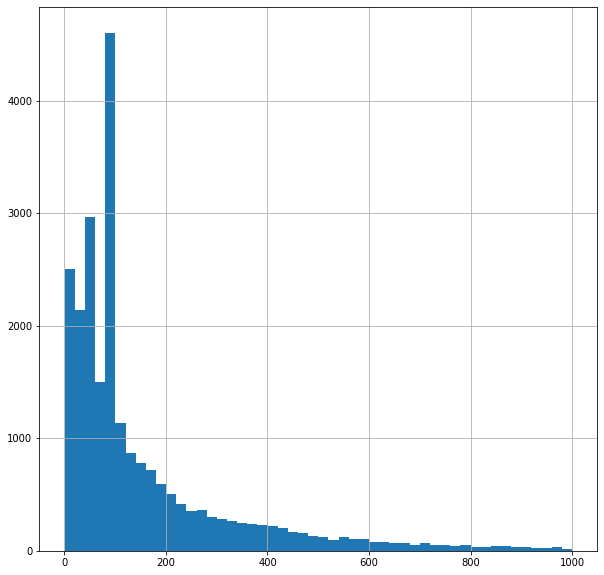

In [51]:
df['days_exposition'].hist(bins = 50, figsize = (10,10))
df['days_exposition'].describe()

Я думаю могут быть варианты которые покупали практически сразу. Но вот странные объявления предложения висели в продаже больше 1000 дней. Долгова-то. Посмотрим подробнее.

In [53]:
df.query('days_exposition > 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,year_exposition,weekday_exposition,month_exposition,living_total_ratio,kitchen_total_ratio,floor_category
42,13,22000000,161,2015-07-08,4,2.80,4,80.90,2,False,False,False,17.60,5,петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987,136645.962733,2015,2,7,0.502484,0.109317,Другой
201,5,10880000,123,2015-11-12,6,3.20,5,89.00,2,False,False,False,11.00,0,санкт-петербург,26009.0,3369.0,2.0,516.0,0.0,NaN,992,88455.284553,2015,3,11,0.723577,0.089431,Другой
319,19,4850000,59,2015-03-19,3,2.50,5,47.40,4,False,False,False,6.40,1,санкт-петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974,82203.389831,2015,3,3,0.803390,0.108475,Другой
557,10,8100000,70,2015-02-11,3,2.84,7,49.50,4,False,False,False,8.60,0,санкт-петербург,25783.0,4358.0,2.0,498.0,0.0,NaN,927,115714.285714,2015,2,2,0.707143,0.122857,Другой
839,15,6195000,56,2015-04-19,2,2.65,14,34.00,10,False,False,False,8.30,0,санкт-петербург,41424.0,10304.0,1.0,288.0,0.0,NaN,919,110625.000000,2015,6,4,0.607143,0.148214,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23269,7,11204000,69,2015-09-20,2,2.65,14,29.60,5,False,False,False,18.40,2,санкт-петербург,19559.0,4768.0,0.0,NaN,1.0,648.0,910,162376.811594,2015,6,9,0.428986,0.266667,Другой
23498,3,5000000,49,2015-03-10,1,2.65,28,30.00,24,False,False,False,9.10,0,санкт-петербург,20028.0,21740.0,0.0,NaN,1.0,400.0,943,102040.816327,2015,1,3,0.612245,0.185714,Другой
23539,1,5953044,89,2015-09-03,3,2.75,23,47.70,17,False,False,False,16.70,0,санкт-петербург,26726.0,8880.0,0.0,NaN,1.0,624.0,939,66888.134831,2015,3,9,0.535955,0.187640,Другой
23552,8,4300000,33,2016-03-29,1,2.58,20,15.10,6,False,False,False,8.60,0,санкт-петербург,33695.0,14794.0,0.0,NaN,0.0,NaN,971,130303.030303,2016,1,3,0.457576,0.260606,Другой


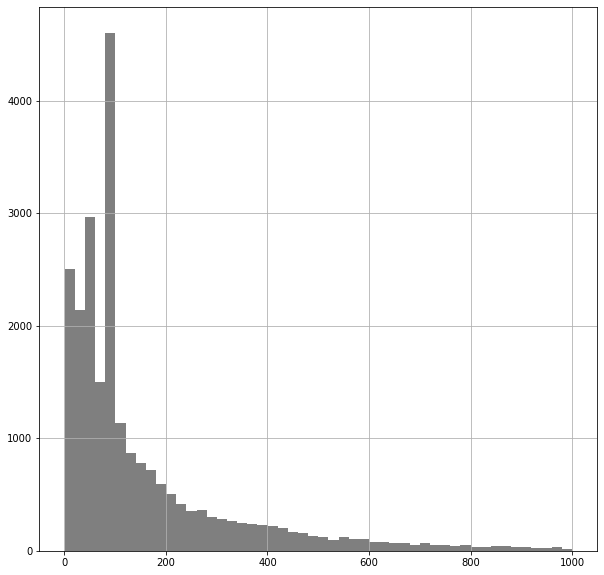

In [54]:
#Будем считать выбросом, удаляем
df = df.query('days_exposition < 1000')
df['days_exposition'].hist(bins = 50, figsize = (10,10), color='k', alpha=0.5)

Есть резкие пики на 60 и 100 дней после публикании объявления о продаже. При это м рапределение в общем выглядит как Пуасоновское. Мне кажется правильно сделать вывод, что это выбросы.

### Изучим взамосвязи признаков

In [23]:
#Изучим взаимосвязи в данных
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,year_exposition,weekday_exposition,month_exposition,living_total_ratio,kitchen_total_ratio
total_images,1.000000,0.103782,0.115547,0.100188,0.053004,0.014878,0.104928,0.031355,0.014254,-0.029848,-0.024585,0.107362,0.048395,-0.001836,-0.046841,0.022728,-0.006549,-0.008658,-0.008308,-0.025237,0.134972,0.136076,-0.011037,0.007579,-0.028729,-0.046184
last_price,0.103782,1.000000,0.651560,0.362246,0.285705,-0.005134,0.536290,0.027684,0.012410,-0.025340,-0.008509,0.435922,0.008411,-0.026106,-0.205128,0.148441,-0.014122,0.160263,-0.086618,0.057828,0.734655,-0.036070,0.002309,0.000364,-0.073674,-0.122760
total_area,0.115547,0.651560,1.000000,0.759470,0.389194,-0.074512,0.872857,-0.024290,0.013713,-0.073211,-0.034464,0.568294,0.010278,-0.030644,-0.231154,0.163196,-0.018037,0.163939,-0.100207,0.102381,0.298726,-0.068868,-0.003222,0.002297,-0.036988,-0.374870
rooms,0.100188,0.362246,0.759470,1.000000,0.242953,-0.226629,0.814173,-0.150985,-0.002653,-0.148663,-0.087405,0.256916,-0.014106,-0.060690,-0.184229,0.136705,-0.051328,0.094821,-0.060059,0.091261,0.052269,-0.047680,-0.003141,-0.004943,0.253639,-0.617941
ceiling_height,0.053004,0.285705,0.389194,0.242953,1.000000,-0.083161,0.366306,-0.045537,0.057572,0.011617,-0.001557,0.320915,-0.043400,-0.082054,-0.294592,0.224085,-0.054530,0.191390,-0.111495,0.076615,0.286923,-0.043539,-0.021912,-0.004008,-0.032281,-0.025015
floors_total,0.014878,-0.005134,-0.074512,-0.226629,-0.083161,1.000000,-0.160474,0.669129,-0.022771,0.067857,0.049963,0.152218,0.175876,0.108560,0.016809,-0.251186,0.097616,-0.124534,0.046634,-0.041582,0.151907,0.008022,0.013907,0.018361,-0.271639,0.334652
living_area,0.104928,0.536290,0.872857,0.814173,0.366306,-0.160474,1.000000,-0.092770,0.004842,-0.054432,-0.032132,0.407146,-0.009329,-0.055777,-0.221858,0.175438,-0.047097,0.143627,-0.078697,0.099049,0.207753,-0.064605,-0.005974,-0.002432,0.331407,-0.471494
floor,0.031355,0.027684,-0.024290,-0.150985,-0.045537,0.669129,-0.092770,1.000000,-0.012780,0.037163,0.034492,0.127279,0.167691,0.073643,0.009265,-0.163000,0.075670,-0.076586,0.027932,-0.030685,0.132360,0.003592,0.013318,0.021264,-0.200725,0.232146
is_apartment,0.014254,0.012410,0.013713,-0.002653,0.057572,-0.022771,0.004842,-0.012780,1.000000,-0.003438,-0.002284,0.031060,0.029735,0.018082,0.012047,0.009901,-0.024595,0.019250,0.005721,-0.003416,0.023423,0.018780,-0.008713,-0.004035,-0.009380,0.011479
studio,-0.029848,-0.025340,-0.073211,-0.148663,0.011617,0.067857,-0.054432,0.037163,-0.003438,1.000000,-0.004262,-0.018676,0.029069,-0.022067,-0.007263,-0.030312,0.009457,0.001268,0.002136,-0.018065,0.016749,0.010157,-0.000995,0.001046,0.096828,0.166375


Просто табличка, не очень наглядно, подглядел на хабре интересный метод для визуализации взаимосвязи через библиотеку seaborn.

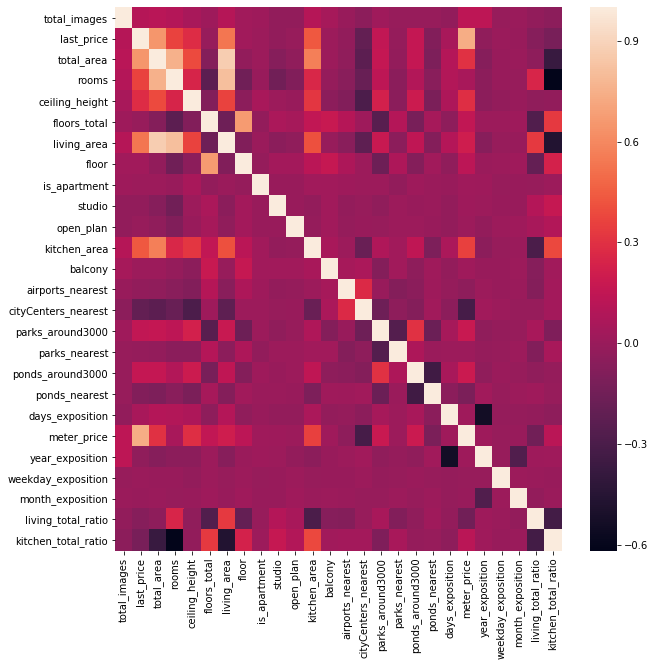

In [24]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr());

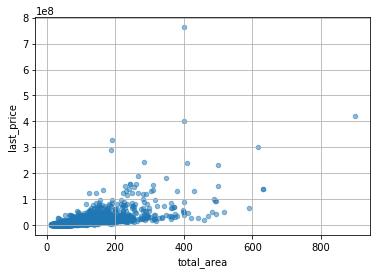

In [25]:
#Рассмотрим подробнее зависимость цены от площади
df.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha = 0.5)

(-1000000, 100000000)

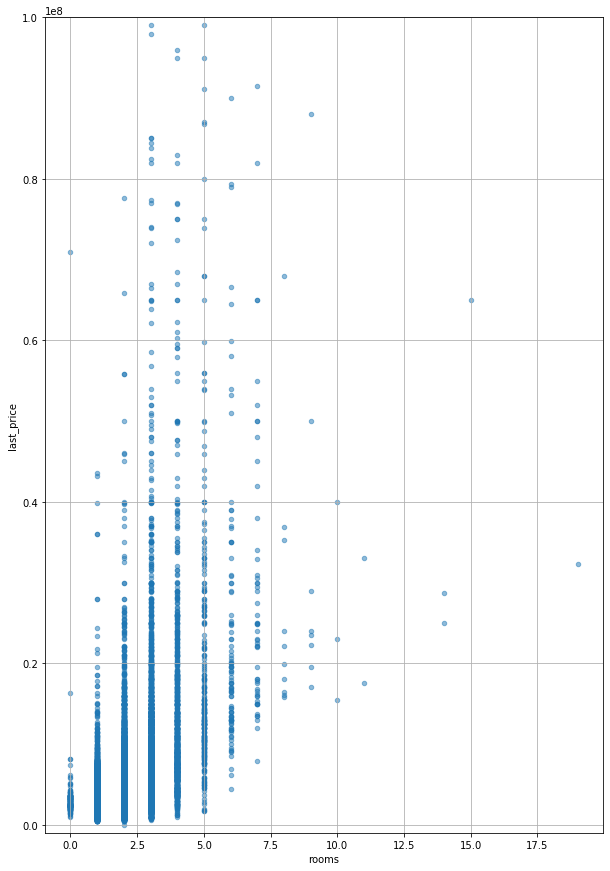

In [26]:
#Зависимость стоимости от количества комнат
df.plot(x='rooms', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (10,15))
plt.ylim(-10**6, 10**8)

(-1000000, 100000000)

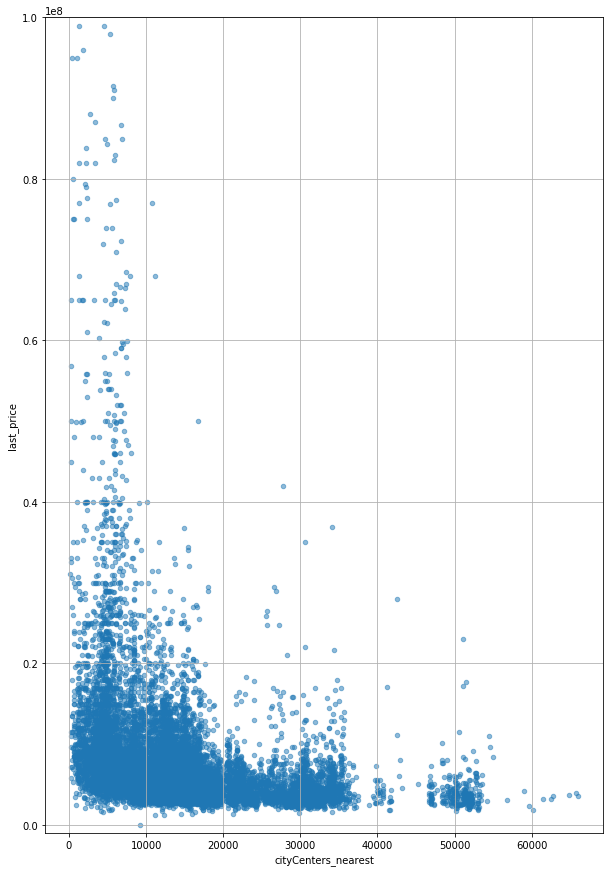

In [27]:
#Зависимость стоимости от расстояния до центра
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (10,15))
plt.ylim(-10**6, 10**8)

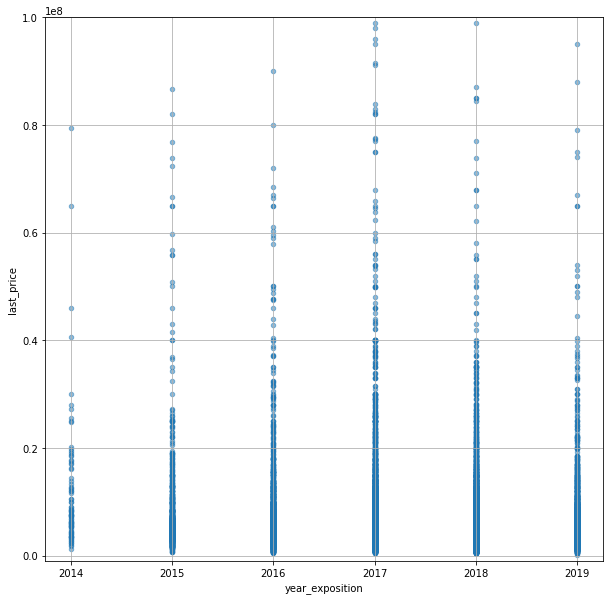

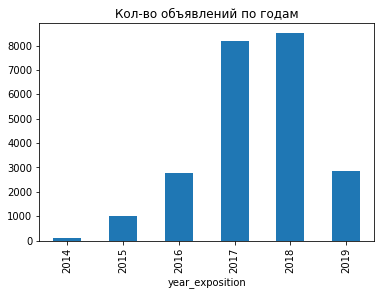

In [62]:
#Зависимость цены от года размещения
df.plot(x='year_exposition', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (10,10))
plt.ylim(-10**6, 10**8)

df.pivot_table(index='year_exposition', values='last_price', aggfunc='count').plot(kind='bar', legend=False, title='Кол-во объявлений по годам')

(-1000000, 100000000)

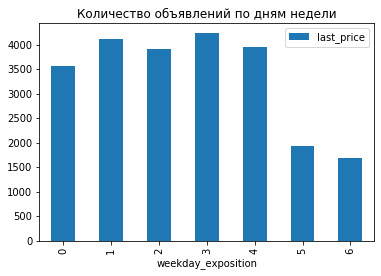

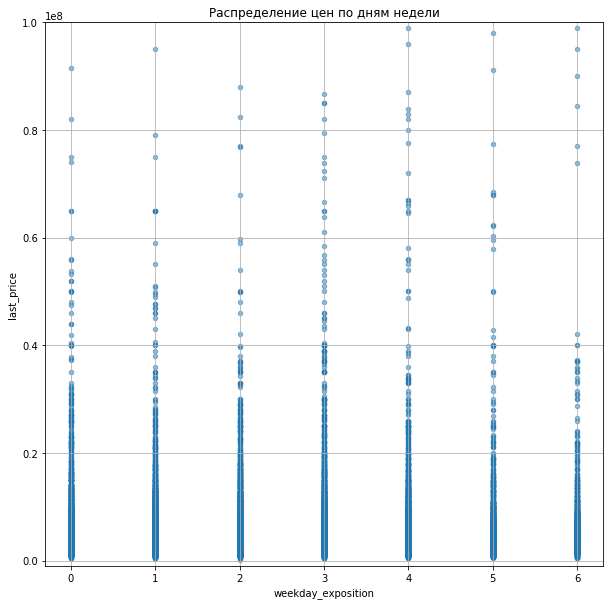

In [29]:
#Зависимость цены от дня недели размещения
weekday_price = df.pivot_table(index='weekday_exposition', values='last_price', aggfunc='count')
weekday_price.plot(kind='bar', title='Количество объявлений по дням недели')
df.plot(x='weekday_exposition', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (10,10), title='Распределение цен по дням недели')
plt.ylim(-10**6, 10**8)

(-1000000, 100000000)

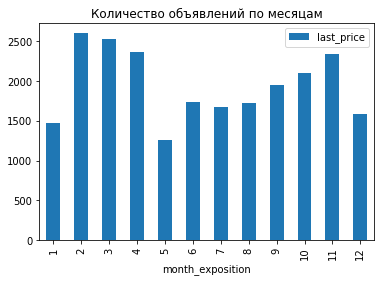

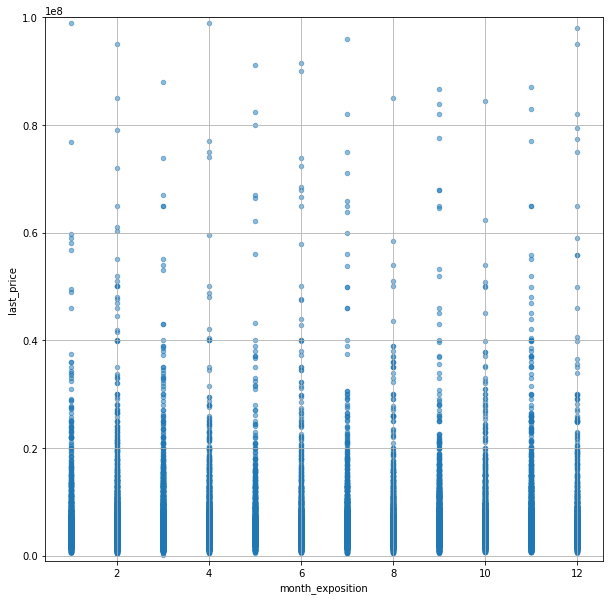

In [30]:
#Зависимость цены от дня недели размещения
month_price = df.pivot_table(index='month_exposition', values='last_price', aggfunc='count')
month_price.plot(kind='bar', title='Количество объявлений по месяцам')
df.plot(x='month_exposition', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (10,10))
plt.ylim(-10**6, 10**8)

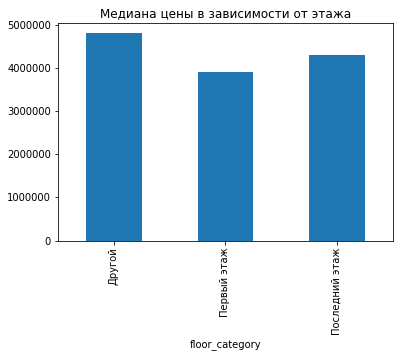

In [31]:
# Посмотрим как этаж влияет на цену
df.groupby('floor_category')['last_price'].median().plot(kind='bar', title='Медиана цены в зависимости от этажа')

### Топ 10 городов по количеству объявлений

In [32]:
df.pivot_table(index='locality_name', values='last_price', aggfunc='count').sort_values(by='last_price', ascending=False).head(10)

,last_price
locality_name,
санкт-петербург,15491
посёлок мурино,515
посёлок шушары,436
всеволожск,393
пушкин,362
колпино,336
посёлок парголово,326
гатчина,306
деревня кудрово,294


### Как удалённость от центра влияет на цену квартиры в Санкт-Петербурге

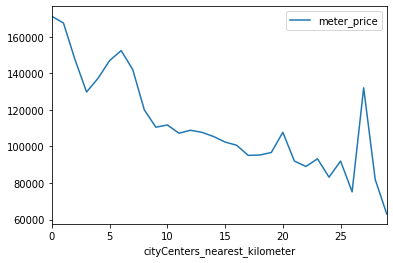

In [66]:
#Создаём отдельный датафрейм по Питеру 

df_spb = df.query('locality_name == "санкт-петербург"').copy()

#Создадим столбец с расстоянием до центра в километрах, только сначала заполним пустые значения
df_spb['cityCenters_nearest'] = df_spb['cityCenters_nearest'].fillna(0)
cityCenters_nearest_kilometer = df_spb['cityCenters_nearest'] / 1000
cityCenters_nearest_kilometer = cityCenters_nearest_kilometer.astype('int')

df_spb['cityCenters_nearest_kilometer'] = cityCenters_nearest_kilometer


#Посчитаем среднюю цену для каждого километра
df_spb_price_kilometer = df_spb.pivot_table(index='cityCenters_nearest_kilometer', values='meter_price', aggfunc='mean').astype('int')

df_spb_price_kilometer.plot()

### Изучение недвижимости в центре Санкт-Петербурга

In [69]:
#Отберём квартиры в центре, судя по графику дальше семи километров уже питерская провинция
df_spb_center = df_spb.query('cityCenters_nearest_kilometer < 7')
df = df_spb.query('cityCenters_nearest_kilometer > 7')

#### Сравним цены на недвижимость во всей таблице с ценами на недвижимость в центре Санкт-Петербурга

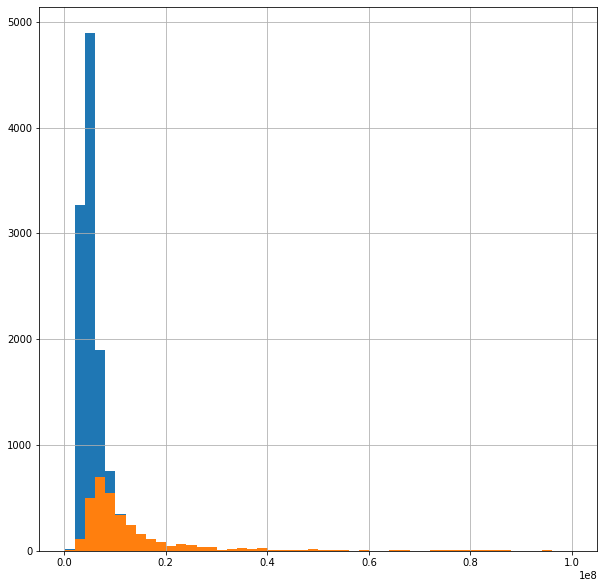

In [70]:
df['last_price'].hist(range =(10**5,  10**8), bins = 50, figsize = (10,10))
df_spb_center['last_price'].hist(range =(10**5,  10**8), bins = 50, figsize = (10,10))

#### Сравним площадь недвижимость (вся таблица vs центр Санкт-Петербурга)

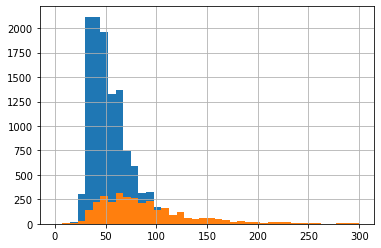

In [71]:
df['total_area'].hist(bins=40, range = (0,300))
df_spb_center['total_area'].hist(bins=40, range = (0,300))

#### Сравним количество комнат (вся таблица vs центр Санкт-Петербурга)

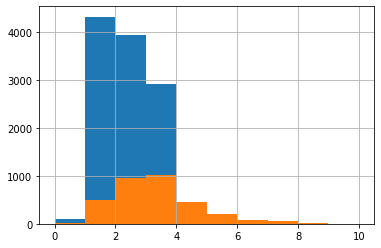

In [74]:
df['rooms'].hist(bins=10, range = (0,10))
df_spb_center['rooms'].hist(bins=10, range = (0,10))

#### Сравним высоту потолков (вся таблица vs центр Санкт-Петербурга)

count    23375.000000
mean         2.696080
std          0.218133
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

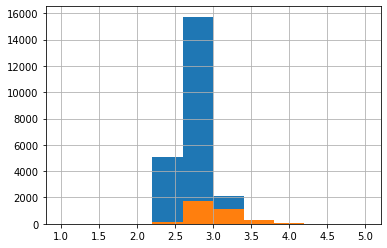

In [38]:
df['ceiling_height'].hist(bins=10, range = (1,5))
df_spb_center['ceiling_height'].hist(bins=10, range = (1,5))
df['ceiling_height'].describe()

#### Найдём зависимости в выборке недвижимости (центр Санкт-Петербурга)

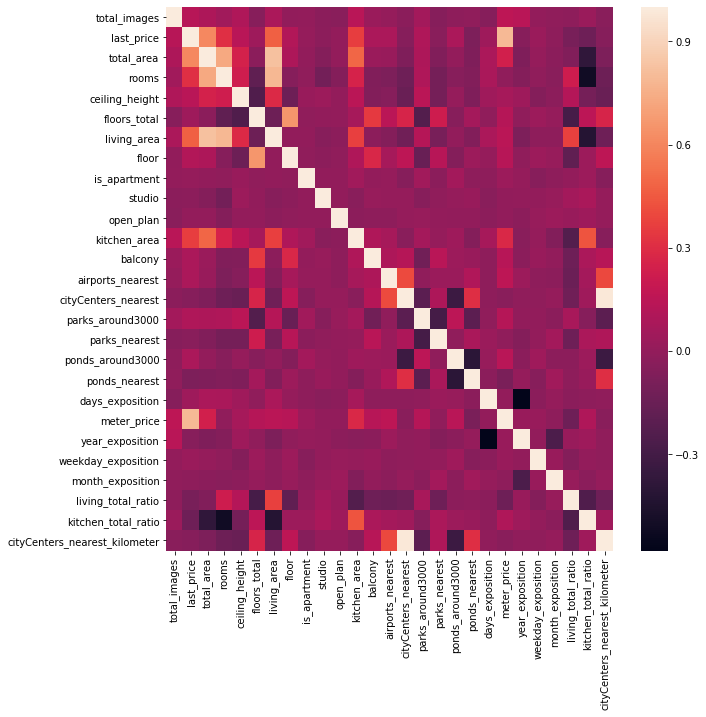

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df_spb_center.corr());

(-1000000, 100000000)

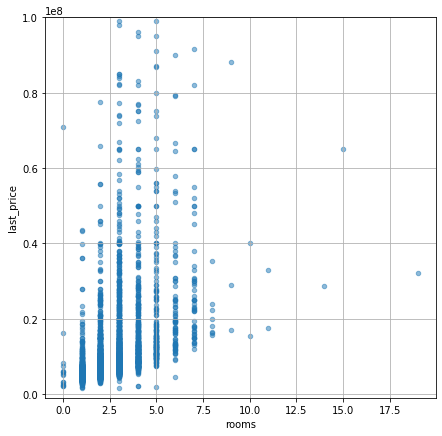

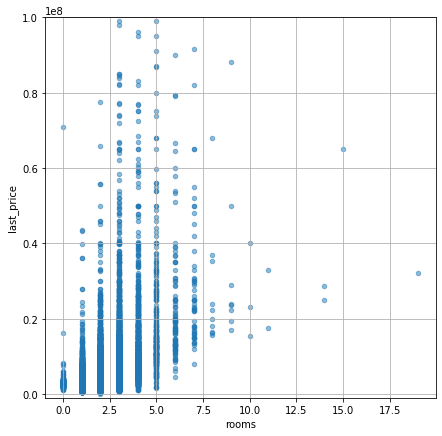

In [40]:
#Зависимость стоимости от количества комнат в центре Спб
df_spb_center.plot(x='rooms', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (7,7))
plt.ylim(-10**6, 10**8)

#Зависимость стоимости от количества комнат по всей таблице
df.plot(x='rooms', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (7,7))
plt.ylim(-10**6, 10**8)

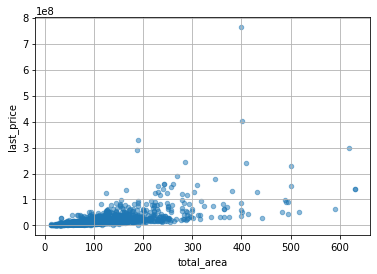

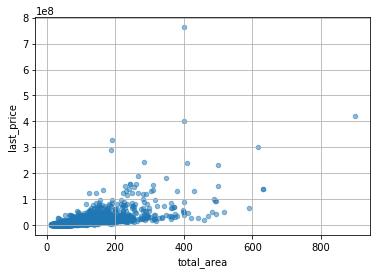

In [41]:
#Рассмотрим подробнее зависимость цены от площади в центре Спб
df_spb_center.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha = 0.5)

#Рассмотрим подробнее зависимость цены от площади по всей таблице
df.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha = 0.5)

(-1000000, 100000000)

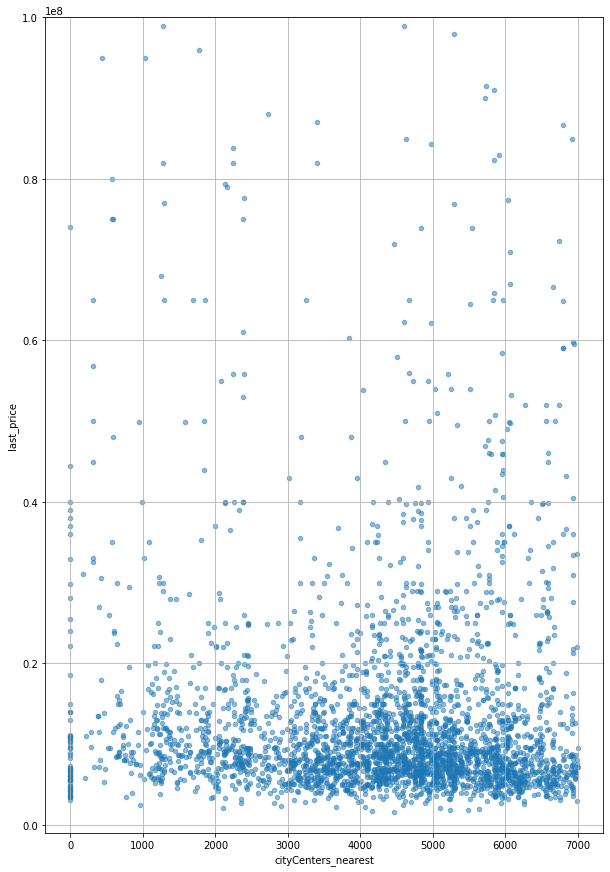

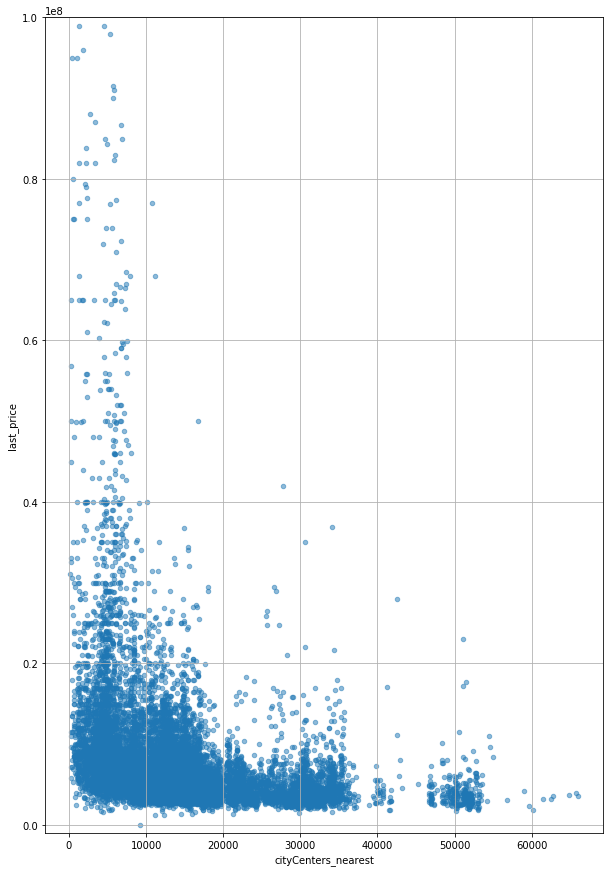

In [42]:
#Зависимость стоимости от расстояния до центра (выборка по центру Спб)
df_spb_center.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (10,15))
plt.ylim(-10**6, 10**8)

#Зависимость стоимости от расстояния до центра общая таблица
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (10,15))
plt.ylim(-10**6, 10**8)

(-1000000, 100000000)

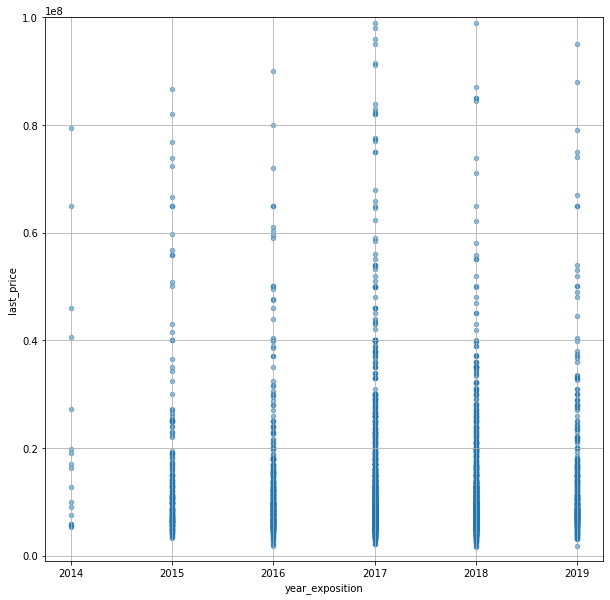

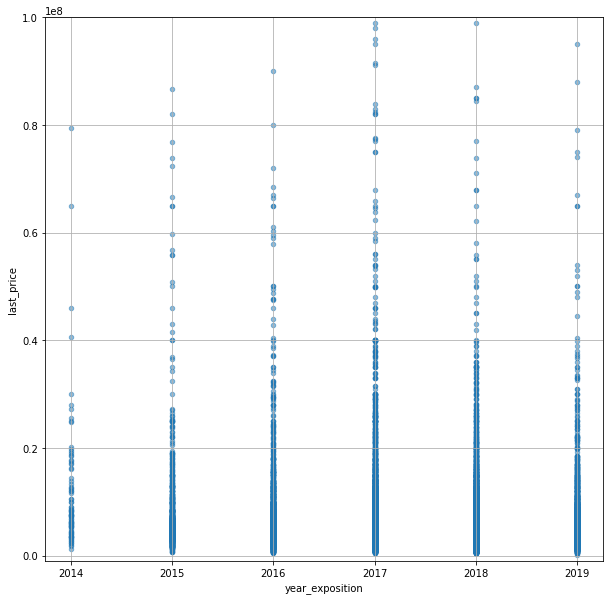

In [43]:
#Зависимость цены от года размещения в центре Спб
df_spb_center.plot(x='year_exposition', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (10,10))
plt.ylim(-10**6, 10**8)

#Зависимость цены от года размещения во всей таблице
df.plot(x='year_exposition', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (10,10))
plt.ylim(-10**6, 10**8)

(-1000000, 100000000)

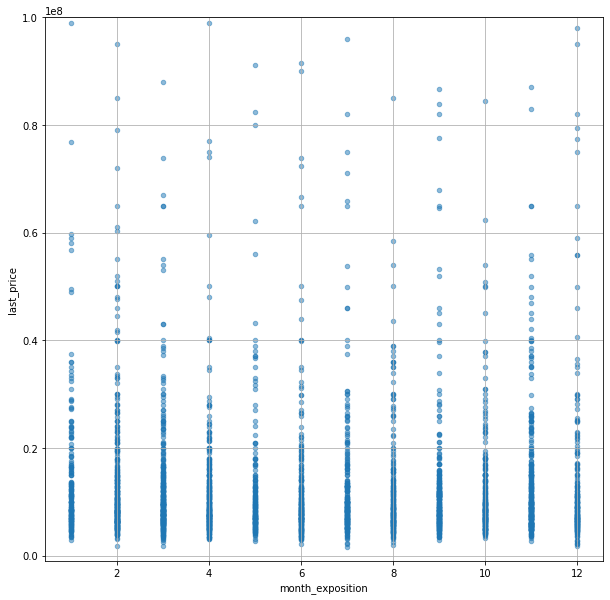

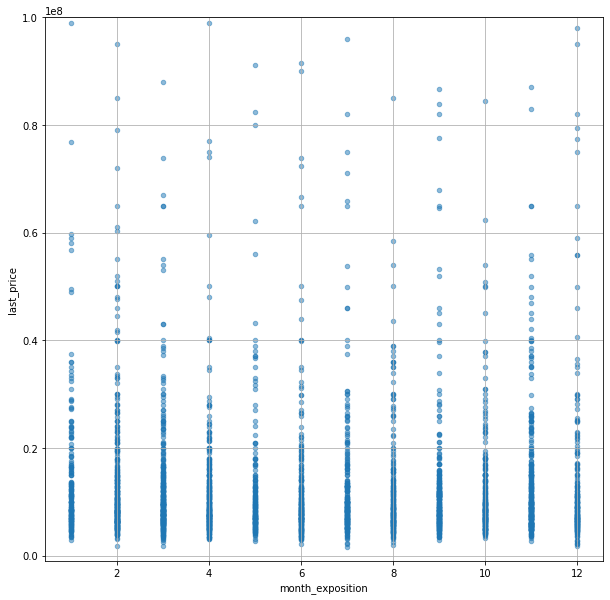

In [44]:
#Зависимость цены от дня недели размещения для недвижимости в центре Спб
df_spb_center.plot(x='month_exposition', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (10,10))
plt.ylim(-10**6, 10**8)

#Зависимость цены от дня недели размещения во всей таблице
df_spb_center.plot(x='month_exposition', y='last_price', kind='scatter', grid=True, alpha = 0.5, figsize = (10,10))
plt.ylim(-10**6, 10**8)

### Шаг 5. Общий вывод

1. Цены на квартиры в Спб и Лен.области в среднем(медиана) стоят 4,65 млн. Есть и элитные квартиры стоимостью от 300 млн., но 75% всех предложение стоят не дороже 6,8 млн.
2. Обычная Питерская квартира имеет площадь 52 км.м, однако есть 27 объявлений, где продают квартиру с площадью меньше 20 квадратов, предполагаю, что это комнаты в коммунальных квартирах.

3. В 75% предложений, в квартире не более 3-х комнат. Так же в продаже имеется дворец с 19 комнатами.
4. Высота потолков от 2.2 и редко превышает 2,7 метров.
5. Обычно на продажу недвижимости уходит 95 дней. Если клиент не может продать квартиру дольше 271 дней, с предложением что-то не так. Если продажа состоялась меньше чем за 45 дней, продавец входит в чисто 25% самых быстропродающих.

6. Осторожно, сейчас будут инсайты! На цену квартиры влияют: общая площадь, количество комнат, высота потолков, жилая площадь, площадь кухни, расстояние до центра, наливе прудов и парков рядом.
7. Чем ближе квартиры к центру, тем больше разброс цен, чем дальше, тем разброс цен меньше, квартиры стоят дешевле.
8. Количество объявлений бурно росло с 2014 до 2017, я думаю из-за развития сервиса, в 2019 наблюдаем падение.

9.Больше всего объявлений было выложено во вторник и четверг. Меньше всего в субботу и воскресенье, видимо риэлторы всё таки отдыхают.
10. Наибольшее количество новых объявлений появляется с февраля по май и с июня по ноябрь. В мае и декабре, количество объявлений наименьшее в году.
11. Квартиры которые находятся на первом или последнем этажах, стоят дешевле чем на других этажах.

12. Больше всего объявлений о продаже выкладывают в СПБ, за ним идут п.Мурино и Шушары, поискал в яндексе, что это за поселки, оказывается не очень благоприятные, люди оттуда бегут.
13. По графику зависимости цены на жильё от расстояния до центра, можно сделать вывод, что центром считаются предложения с удалением до 7 км. В переделах центра квадратный метр стоит от 120 тысяч рублей.
14. В центре Спб, гистограмма цен на недвиьку скошена вправо сильнее, чем гистограмма по всем данным.
15. В центре Спб преобладают квартиры с 2-4 комнатами, в то время как в остальных предложениях преобладают однушки.
16. В метре Спб потолки в квартирах выше, чем в других районах. 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод